# Классификация твитов
### Иван Людвиг Терешко, Б03-901

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Preproccessing

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.fillna(0)
df['airline_sentiment'] = df['airline_sentiment'].map({'positive': 1, 'neutral': 0,'negative': -1})
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
sentiments = ['negative', 'neutral', 'positive']
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i didn't today... must mean i n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Сравнение моделей

In [6]:
count_vect = CountVectorizer()
matrix_count = count_vect.fit_transform(df['text'])

y = df['airline_sentiment']

x_train, x_test, y_train, y_test = train_test_split(matrix_count, y, test_size=0.3, random_state=0)

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

def report(grid_searcher, X_test, Y_test):
    print('train score is {:.5f}'.format(grid_searcher.best_score_))
    print('test score is {:.5f}'.format(grid_searcher.score(X_test, Y_test)))
    print('best parameter set:')
    for k in sorted(grid_searcher.best_params_):
        print (' * {}={}'.format(k, grid_searcher.best_params_[k]))

Сперва попробуем построить модель с помощью логистической регрессии, подбирая гиперпараметры используя `GridSearchCV`.

In [8]:
%%time

grid_searcher = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'C': [2**(x/10.0) for x in range(-50, 50, 10)]
    },
    scoring='accuracy', cv=10, n_jobs=16).fit(x_train, y_train)
report(grid_searcher, x_test, y_test)
best_model = grid_searcher.best_estimator_
best_params = grid_searcher.best_params_

train score is 0.80689
test score is 0.79622
best parameter set:
 * C=0.25
CPU times: user 3.52 s, sys: 7.24 s, total: 10.8 s
Wall time: 38.9 s


/home/ivanludvig/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Далее попробуем использовать `RandomForestClassifier`

In [9]:
%%time

tree_grid_searcher = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid={
        'n_estimators': range(1, 1000, 100)
    }, 
    scoring='accuracy', cv=10, n_jobs=4).fit(x_train, y_train)
report(tree_grid_searcher, x_test, y_test)

/home/ivanludvig/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


train score is 0.76191
test score is 0.75615
best parameter set:
 * n_estimators=901
CPU times: user 2min, sys: 959 ms, total: 2min
Wall time: 30min 34s


Значительно медленее, результат хуже

Попробуем использовать xgboost

In [10]:
%%time

params = {
    'eta': [0.05, 0.1, 0.02],
    'max_depth': range(2, 5)
}

xgb = XGBClassifier()
xgboost_grid_searcher = GridSearchCV(xgb, param_grid = params)
fitted = xgboost_grid_searcher.fit(x_train, y_train)
best_model = xgboost_grid_searcher.best_estimator_
prediction = best_model.predict(x_test)
report(fitted, x_test, y_test)

train score is 0.74844
test score is 0.75250
best parameter set:
 * eta=0.1
 * max_depth=4
CPU times: user 7min 40s, sys: 4.97 s, total: 7min 45s
Wall time: 1min 26s


Модель использующая градиентный бустинг xgboost работает хуже.   
Итак, логистическая регрессия в этой задаче показывает наилучшие результаты.

## Использование различных техник для обработки текста
Теперь обучим логистическую регрессию при использовании различных техник: выкидывание стоп слов, стемминг, TF-IDF.

In [11]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
stemmer = PorterStemmer()

x_train, x_test, y_train, y_test = train_test_split(matrix_count, y, test_size=0.3, random_state=0)

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

def train_log_reg(vectorizer):
    matrix = vectorizer.fit_transform(df['text'])
    X_train, X_test, Y_train, Y_test = train_test_split(matrix, y, test_size=0.3, random_state=0)
    model = LogisticRegression(**best_params, max_iter=200)
    model.fit(X_train, Y_train)
    prediction = model.predict_proba(X_test)
    print('score: {:.5f}'.format(model.score(X_test, Y_test)))
    return prediction

In [12]:
print('===all===')
logreg = train_log_reg(CountVectorizer())
print('\n===without stop-words===')
logreg_no_stopwords = train_log_reg(CountVectorizer(stop_words='english'))
print('\n===with stemming===')
logreg_lemm = train_log_reg(CountVectorizer(tokenizer=tokenize))
print('\n===with stemming without stop-words===')
logreg_lemm_no_stopwords = train_log_reg(CountVectorizer(stop_words='english', tokenizer=tokenize))

===all===
score: 0.79622

===without stop-words===
score: 0.77687

===with stemming===
score: 0.80123

===with stemming without stop-words===


/home/ivanludvig/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words

score: 0.78666


Итак, использование стемминга немного улучшает результат. Выкидывание стоп слов даёт резлультат хуже.

Обучим те же модели, но используя векторизатор `TfidfVectorizer`

In [13]:
print('===all===')
logreg_tfidf = train_log_reg(TfidfVectorizer())
print('\n===without stop-words===')
logreg_no_stopwords_tfidf = train_log_reg(TfidfVectorizer(stop_words='english'))
print('\n===with stemming===')
logreg_lemm_tfidf = train_log_reg(TfidfVectorizer(tokenizer=tokenize))
print('\n===with stemming without stop-words===')
logreg_lemm_no_stopwords_tfidf = train_log_reg(TfidfVectorizer(stop_words='english', tokenizer=tokenize))

===all===
score: 0.76571

===without stop-words===
score: 0.74226

===with stemming===
score: 0.77436

===with stemming without stop-words===


/home/ivanludvig/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words

score: 0.75911


Такой векторизатор даёт результат хуже для всех моделей

## Лучшая модель

Итак, лучше всего работает логистическая регрессия, использующая стемминг для преобразования исходного текста и `CountVectorizer`.

In [14]:
matrix = CountVectorizer(tokenizer=tokenize).fit_transform(df['text'])
x_train, x_test, y_train, y_test = train_test_split(matrix, y, test_size=0.3, random_state=0)
model = LogisticRegression(**best_params, max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(C=0.25, max_iter=200)

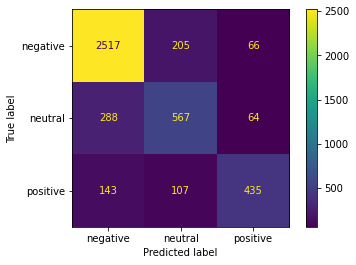

In [15]:
prediction = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, prediction)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sentiments)

disp = disp.plot()

plt.show()

In [16]:
print(f"Precision: {metrics.precision_score(y_test, prediction, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_test, prediction, average='weighted')}")
print(f"Accuracy score: {metrics.accuracy_score(y_test, prediction)}")

Precision: 0.7970363293648327
Recall: 0.8012295081967213
Accuracy score: 0.8012295081967213
